In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('IIRR_DataSet(1).csv') # Reading data set 

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Encoding the categorical columns & checkong for correlations 
uniq = df['Place '].unique()

def place_code(n):
    
    for i in range(len(uniq)):
        
        if uniq[i]==n:
            
            return i
        
df['Place_code'] = df['Place '].apply(place_code)
    
    



for i in df.columns[1:]:
    
    print('{}      {}     \n'.format(i,np.corrcoef(df[i],df['Yield'])[0][1]))

print(df.columns)

Year       0.20088095141429513     

Rainfall      -0.30595009708712667     

Min_Temperature      0.4340412557680904     

Max_Temperature      0.5595990384311554     

Sowing_Day      -0.41803729277217916     

Sowing_Month      0.46011272262877295     

Sowing_Rainfall      0.024726006875503404     

Sowing_Min      0.38835011680040765     

Sowing_Max      0.5372619596465172     

Harvesting_Day       -0.36965526998330256     

Harvesting_Month      -0.21129827836678633     

Harvesting_Rainfall      0.1987012548665167     

Harvesting_Min      0.09671290844592055     

Harvesting_Max      -0.12333831984646869     

Yield      1.0     

Place_code      0.16231622039089486     

Index(['Place ', 'Year ', 'Rainfall', 'Min_Temperature', 'Max_Temperature',
       'Sowing_Day', 'Sowing_Month', 'Sowing_Rainfall', 'Sowing_Min',
       'Sowing_Max', 'Harvesting_Day ', 'Harvesting_Month',
       'Harvesting_Rainfall', 'Harvesting_Min', 'Harvesting_Max', 'Yield',
       'Place_code'],
      

In [4]:
from sklearn.model_selection import train_test_split #dividing dataset into traning and testing sets

X = df[[ 'Place_code','Rainfall', 'Min_Temperature', 'Max_Temperature',
       'Sowing_Day', 'Sowing_Month', 'Sowing_Rainfall', 'Sowing_Min',
       'Sowing_Max']]

y = df['Yield']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 101)

df.to_csv('IIRR_DataSet_1.csv')

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor,kernels


 0.005    -7.996914765138925

 0.005    -7.996914765138925

 0.001    -7.996914765138925

 0.05    -7.996914765138925

 0.01    -7.996914765138925

 0.5    -7.996914765138925

 0.1    -7.996914765138925

 1.0    -7.996914765138925

 5.0    -7.996914765138925

 10.0    -7.996914765138925

 25    -7.996914765138925

 50    -7.996914765138925

 75    -7.996914765138925

 100.0    -7.996914765138925

 1000.0    -7.996914765138925



Text(0, 0.5, 'R Square ')

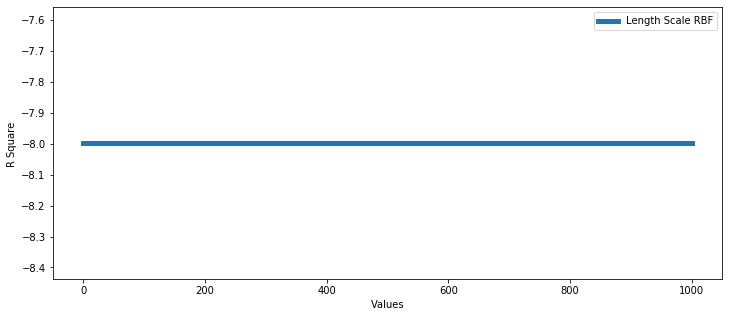

In [9]:
# Model with gaussian kernels 
from sklearn.metrics import r2_score
length_scale = [0.005,0.001,0.05,0.01,0.5,0.1,1.0,5.0,10.0,25,50,75,100.0,1000.0]



scale = []



acc_2 = []
max_score = -100

for i in length_scale:
           
        
    svr = GaussianProcessRegressor(kernel = kernels.RBF(length_scale = 1000))
                    
    svr.fit(x_train,y_train)
        
    score = svr.score(x_test,y_test)
        
    scale.append(i)
    acc_2.append(score)
    print(' {}    {}\n'.format(i,score))    
    if score> max_score:
        
        
        
                                
        max_score = score
                
        print(' {}    {}\n'.format(i,score))
                    
plt.figure(figsize = (12,5))

sns.lineplot(scale,acc_2,label = 'Length Scale RBF',lw = 5)
plt.xlabel('Values')
plt.ylabel('R Square ')

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1e+03), n_restarts_optimizer=0,
                         normalize_y=False, optimizer='fmin_l_bfgs_b',
                         random_state=None)
R Sqaure : 0.0
Mean Absolute Error : 4.793947368421051
Mean Squared Error : 25.855781105263155
1.0


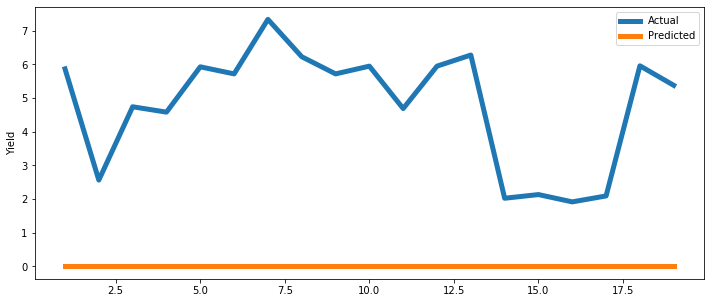

In [10]:
model = GaussianProcessRegressor(kernel = kernels.RBF(length_scale = 1000))

print(model.fit(x_train,y_train))

preds_RBF = model.predict(x_test)

index = np.linspace(1,19,19)
plt.figure(figsize = (12,5))
sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_RBF,label = 'Predicted',lw = 5)
print('R Sqaure : {}'.format(r2_score(preds_RBF,y_test)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_RBF)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,preds_RBF)))
print(model.score(x_train,y_train))

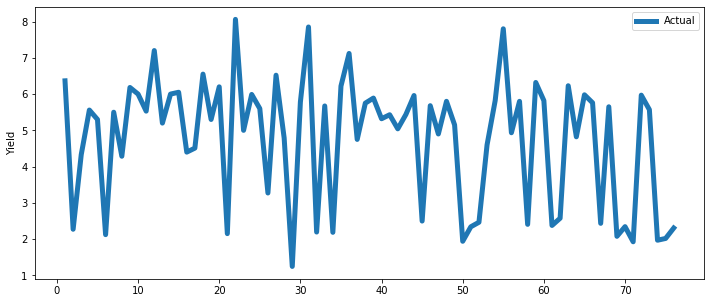

In [12]:
ind = np.linspace(1,76,76)
plt.figure(figsize = (12,5))
sns.lineplot(ind,y_train,label = 'Actual',lw = 5)


C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\gssra\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


Text(0, 0.5, 'Yield')

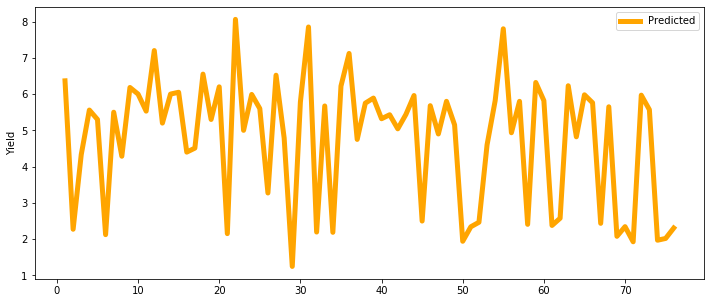

In [13]:
plt.figure(figsize = (12,5))
sns.lineplot(ind,model.predict(x_train),label = 'Predicted',lw = 5,c='orange')
plt.ylabel('Yield')

In [14]:
model.score(x_test,y_test)

-7.996914765138925

In [15]:
# Gaussian model with Rational Quadratic Kernel
length_scale = [0.001,0.01,0.1,1.0,10.0,25,50,75,100.0]

alpha = [0.0001,0.001,0.1,1.0,1.5,10.0,25,50,75,100.0]

scale = []

alp = []

acc_1 = []
max_score = -100

for i in length_scale:
    
    for j in alpha:
        
        
        svr = GaussianProcessRegressor(kernel = kernels.RationalQuadratic(length_scale = i,alpha = j))
                    
        svr.fit(x_train,y_train)
        
        score = svr.score(x_test,y_test)
        
        
        scale.append(i)
        alp.append(j)
        acc_1.append(r2_score(y_test,svr.predict(x_test)))
        
        if score> max_score:
            scale.append(i)
            alp.append(j)
            acc_1.append(svr.score(x_test,y_test))
                                
            max_score = score
            
            print(' {}    {}    {}\n'.format(i,j,score))
                    
                    

 0.001    0.0001    -7.996914765138925

 0.001    0.1    0.772381183971061

 0.001    1.0    0.7723812790783223

 0.01    100.0    0.7723820856058382



Text(0, 0.5, 'R Sqaure')

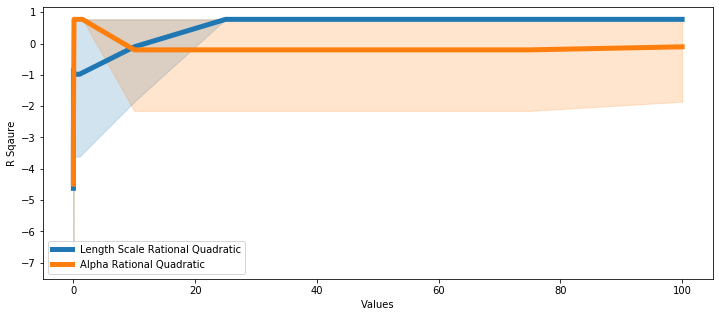

In [16]:
plt.figure(figsize = (12,5))
sns.lineplot(scale,acc_1,lw = 5,label = 'Length Scale Rational Quadratic')
sns.lineplot(alp,acc_1, lw = 5, label = 'Alpha Rational Quadratic')

plt.xlabel('Values')
plt.ylabel('R Sqaure')


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RationalQuadratic(alpha=0.1, length_scale=100),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
0.7723811972978142
R Sqaure : 0.7723811972978142
Mean Absolute Error : 0.6561580460006463
Mean Squared Error : 0.6541422356154688


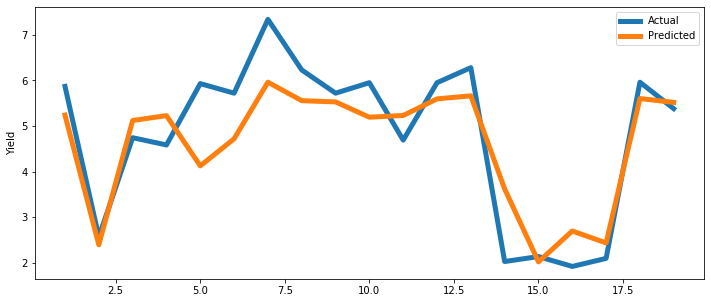

In [17]:
svr = GaussianProcessRegressor(kernel = kernels.RationalQuadratic(length_scale = 100,alpha = 0.1))
                    
print(svr.fit(x_train,y_train))
print(svr.score(x_test,y_test))

preds_Rational = svr.predict(x_test)
print('R Sqaure : {}'.format(r2_score(y_test,preds_Rational)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_Rational)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,preds_Rational)))
plt.figure(figsize = (12,5))
index = np.linspace(1,19,19)

sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_Rational,label = 'Predicted',lw = 5)


In [18]:
from sklearn.linear_model import Lasso,Ridge

In [19]:
# Lasso Regression model
lasso = Lasso()
max_score = -1
alpha = [0.0000001,0.00001,0.0001,0.01,0.1,1.0,10.0,100.0,1000.0]
tol_1 = [0.000000001,0.00001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

alp_1 = []
tolerance = []
acc = []
for i in alpha: 
    for j in tol_1:
        lasso = Lasso(alpha = i,tol = j)
        lasso.fit(x_train,y_train)
        alp_1.append(i)
        tolerance.append(j)
        acc.append(lasso.score(x_test,y_test))
        if lasso.score(x_test,y_test)>max_score:
            max_score = lasso.score(x_test,y_test)
            print('alpha = {}    tol = {}   score = {}'.format(i,j,lasso.score(x_test,y_test)))

alpha = 1e-07    tol = 1e-09   score = 0.539780370157794
alpha = 1e-07    tol = 1e-05   score = 0.5397803738267789
alpha = 1e-07    tol = 0.001   score = 0.5397804100127334
alpha = 1e-07    tol = 0.01   score = 0.539780522962943
alpha = 1e-07    tol = 0.1   score = 0.5397820154295023
alpha = 1e-07    tol = 1.0   score = 0.7218412164565291
alpha = 1e-05    tol = 1.0   score = 0.7218443469129364
alpha = 0.0001    tol = 1.0   score = 0.7218718715114831
alpha = 0.01    tol = 1.0   score = 0.7219670793250299


R Sqaure :0.7219670793250299
Mean Absolute Error : 0.7012667722664352
Mean Squared Error : 0.7990248351450304


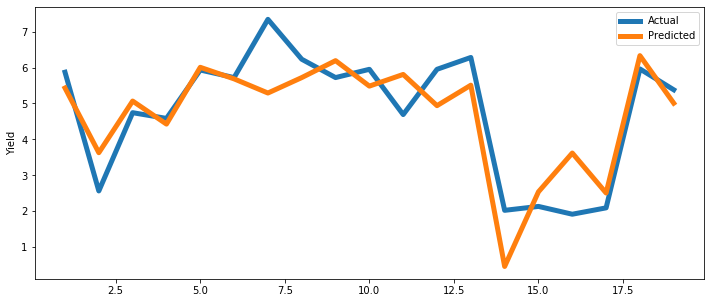

In [20]:
plt.figure(figsize = (12,5))
lasso = Lasso(alpha = 0.01,tol = 1.0)
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)
preds_Lasso = lasso.predict(x_test)
print('R Sqaure :{}'.format(r2_score(y_test,preds_Lasso)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_Lasso)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,preds_Lasso)))
sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_Lasso,label = 'Predicted',lw = 5)

In [21]:
df.columns

Index(['Place ', 'Year ', 'Rainfall', 'Min_Temperature', 'Max_Temperature',
       'Sowing_Day', 'Sowing_Month', 'Sowing_Rainfall', 'Sowing_Min',
       'Sowing_Max', 'Harvesting_Day ', 'Harvesting_Month',
       'Harvesting_Rainfall', 'Harvesting_Min', 'Harvesting_Max', 'Yield',
       'Place_code'],
      dtype='object')

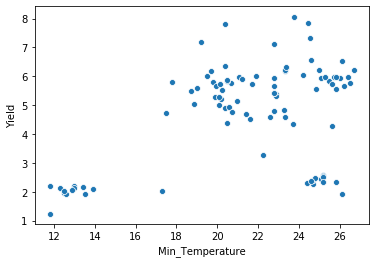

In [22]:
sns.scatterplot(df['Min_Temperature'],df['Yield'])

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# K nearest Neighbors model this performed best so we used this as the main model

n = [1,2,3,4,5,10,15,25]

n_ball = []
n_kd = []
n_brute = []


algo = []

leaf_ball = []
leaf_kd = []
leaf_brute = []

p_ball = []
p_kd = []
p_brute = []

score_ball = []
score_kd = []
score_brute = []

algorithm = ['ball_tree','kd_tree','brute']

leaf_size = [1,2,3,4,5,10,15,20,25,30]

p = [1,2,3,4,5]
max_score = -1

for i in n:
    
    for j in algorithm:
        
        for x in leaf_size:
            
            for z in p:
                
                model = KNeighborsRegressor(n_neighbors = i, algorithm = j,leaf_size = x, p = z)
                
                model.fit(x_train,y_train)
                
                score = model.score(x_test,y_test)
                
                if j == 'ball_tree':
                    leaf_ball.append(x)
                    n_ball.append(i)
                    p_ball.append(z)
                    score_ball.append(score)
                
                elif j == 'kd_tree':
                    leaf_kd.append(x)
                    n_kd.append(i)
                    p_kd.append(z)
                    score_kd.append(score)
                
                elif j == 'brute':
                    leaf_brute.append(x)
                    n_brute.append(i)
                    p_brute.append(z)
                    score_brute.append(score)
                
                if score>max_score:
                    max_score = score
                    
                    print('n_neighbors = {}, algorithm = \'{}\',leaf_size = {}, p = {} score = {}'.format(i,j,x,z,score))


n_neighbors = 1, algorithm = 'ball_tree',leaf_size = 1, p = 1 score = 0.8891928110398777
n_neighbors = 2, algorithm = 'ball_tree',leaf_size = 1, p = 1 score = 0.9413161594796668
n_neighbors = 3, algorithm = 'ball_tree',leaf_size = 1, p = 1 score = 0.95298845469988


KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='uniform')
R Sqaure : 0.9529884546998801
Mean Absolute Error : 0.2888421052631581
Mean Sqaured Error : 0.1351041169590644


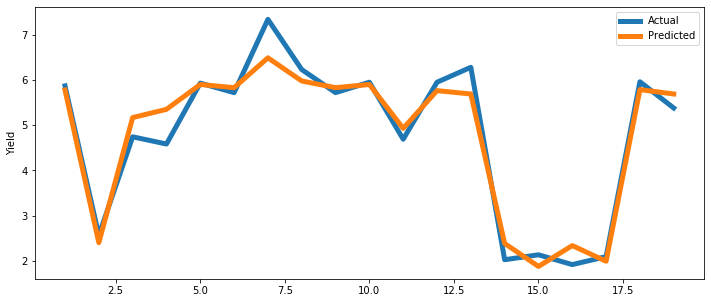

In [24]:
model = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree',leaf_size = 1, p = 1)
                
print(model.fit(x_train,y_train))

preds_KNN_ball_tree = model.predict(x_test)

print('R Sqaure : {}'.format(r2_score(y_test,preds_KNN_ball_tree)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_KNN_ball_tree)))
print('Mean Sqaured Error : {}'.format(mean_squared_error(y_test,preds_KNN_ball_tree)))
plt.figure(figsize = (12,5))
sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_KNN_ball_tree,label = 'Predicted',lw = 5)


KNeighborsRegressor(algorithm='kd_tree', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
R Sqaure : 0.8515069821419041
Mean Absolute Error : 0.45070175438596516
Mean Sqaured Error : 0.4267466198830411


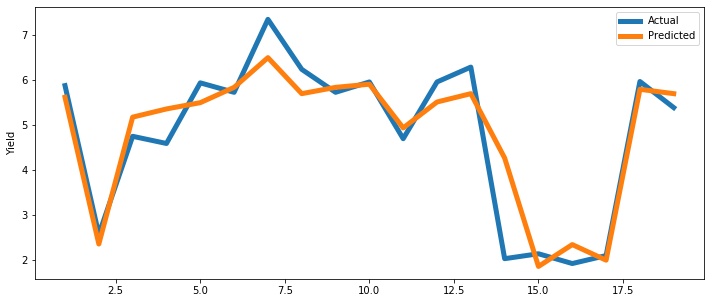

In [25]:
model = KNeighborsRegressor(n_neighbors = 3, algorithm = 'kd_tree',leaf_size = 1, p = 2)
                
print(model.fit(x_train,y_train))

preds_KNN_kd_tree = model.predict(x_test)

print('R Sqaure : {}'.format(r2_score(y_test,preds_KNN_kd_tree)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_KNN_kd_tree)))
print('Mean Sqaured Error : {}'.format(mean_squared_error(y_test,preds_KNN_kd_tree)))
plt.figure(figsize = (12,5))
sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_KNN_kd_tree,label = 'Predicted',lw = 5)


R Square : 0.8515069821419041
Mean Absolute Error : 0.45070175438596516
Mean Squared Error : 0.4267466198830411


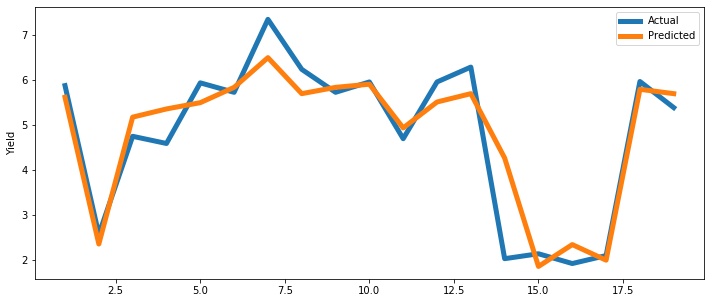

In [26]:
model = KNeighborsRegressor(n_neighbors = 3, algorithm = 'brute',leaf_size = 1, p = 2)
model.fit(x_train,y_train)
preds_KNN_Brute = model.predict(x_test)
print('R Square : {}'.format(r2_score(y_test,preds_KNN_Brute)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_KNN_Brute)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,preds_KNN_Brute)))
plt.figure(figsize = (12,5))
sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_KNN_Brute,label = 'Predicted',lw = 5)


Text(0, 0.5, 'R Sqaure')

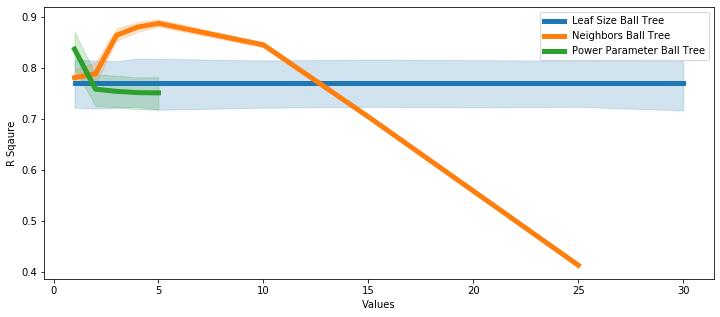

In [27]:
plt.figure(figsize = (12,5))
sns.lineplot(leaf_ball,score_ball,lw = 5,label = 'Leaf Size Ball Tree')
sns.lineplot(n_ball,score_ball, lw = 5, label = 'Neighbors Ball Tree')
sns.lineplot(p_ball,score_ball, lw = 5,label = 'Power Parameter Ball Tree')
plt.xlabel('Values')
plt.ylabel('R Sqaure')

Text(0, 0.5, 'R Sqaure')

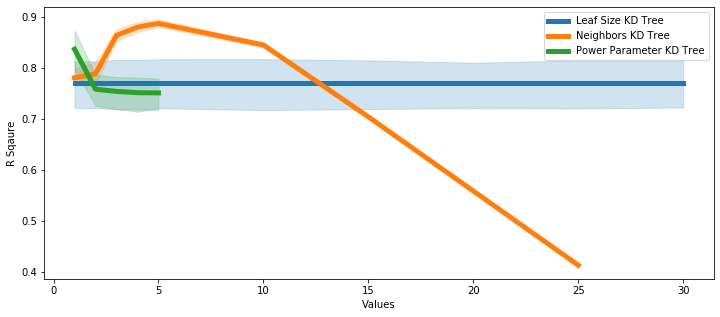

In [28]:
plt.figure(figsize = (12,5))
sns.lineplot(leaf_kd,score_kd,lw = 5,label = 'Leaf Size KD Tree')
sns.lineplot(n_kd,score_kd, lw = 5,label = 'Neighbors KD Tree')
sns.lineplot(p_kd,score_kd, lw = 5, label = 'Power Parameter KD Tree')
plt.xlabel('Values')
plt.ylabel('R Sqaure')

Text(0, 0.5, 'R Sqaure')

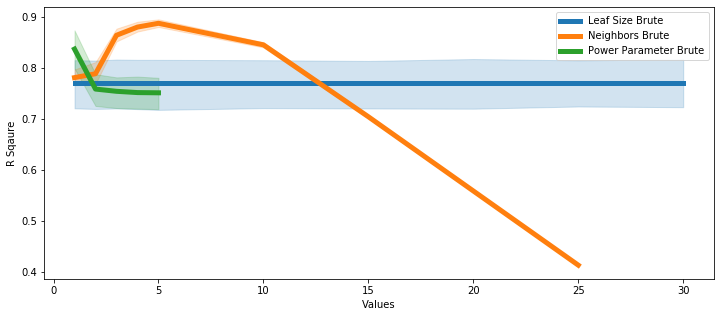

In [29]:
plt.figure(figsize = (12,5))

sns.lineplot(leaf_brute,score_brute,lw = 5,label = 'Leaf Size Brute')
sns.lineplot(n_brute,score_brute, lw = 5,label = 'Neighbors Brute')
sns.lineplot(p_brute,score_brute, lw = 5,label = 'Power Parameter Brute')
plt.xlabel('Values')
plt.ylabel('R Sqaure')

In [30]:
from sklearn.kernel_ridge import KernelRidge
# Kernel Ridge model second best algorithm in terms of accuracy 
kernel = ['linear','rbf','poly' ]
max_score = -1000000000
gamma = [0.0001,0.0005,0.001,0.005,0.1,0.5,1.0,10.0,100.0]

score_linear = []
score_rbf = []
score_poly = []

alpha_linear = []
alpha_rbf = []
alpha_poly = []

degree_linear = []
degree_rbf = []
degree_poly = []

gamma_linear = []
gamma_rbf = []
gamma_poly = []


alpha = [0.001,0.01,0.1,1.0,10.0,100.0]

degree = [1,2,3,4,5]

for i in kernel:
    
    for j in gamma:
        
        for k in alpha:
            
            for x in degree:
                model = KernelRidge(alpha = k, kernel = i, gamma = j, degree = x)
    
                model.fit(x_train,y_train)
                score = r2_score(y_test,model.predict(x_test))
                if i == 'linear':
                    score_linear.append(score)
                    alpha_linear.append(k)
                    degree_linear.append(x)
                    gamma_linear.append(j)
                    
                elif i == 'rbf':
                    
                    score_rbf.append(score)
                    alpha_rbf.append(k)
                    degree_rbf.append(x)
                    gamma_rbf.append(j)
                    
                elif i == 'poly':
                    score_poly.append(score)
                    alpha_poly.append(k)
                    degree_poly.append(x)
                    gamma_poly.append(j)

               
                
                if score > max_score:
                    max_score = score 
                    print('alpha = {}, kernel = \'{}\', gamma = {}, degree = {} score = {}'.format(k,i,j,x,score))
                

alpha = 0.001, kernel = 'linear', gamma = 0.0001, degree = 1 score = 0.5171517706604043
alpha = 0.01, kernel = 'linear', gamma = 0.0001, degree = 1 score = 0.5238625453869765
alpha = 0.1, kernel = 'linear', gamma = 0.0001, degree = 1 score = 0.5674663088972449
alpha = 1.0, kernel = 'linear', gamma = 0.0001, degree = 1 score = 0.6456215210058993
alpha = 0.001, kernel = 'rbf', gamma = 0.0005, degree = 1 score = 0.6959904748114617
alpha = 0.01, kernel = 'rbf', gamma = 0.005, degree = 1 score = 0.7028240950966789
alpha = 0.01, kernel = 'rbf', gamma = 0.1, degree = 1 score = 0.8149496214865132
alpha = 0.01, kernel = 'poly', gamma = 0.1, degree = 2 score = 0.8457682569670913
alpha = 1.0, kernel = 'poly', gamma = 0.5, degree = 3 score = 0.8515399435037108


KernelRidge(alpha=1.0, coef0=1, degree=1, gamma=0.0001, kernel='linear',
            kernel_params=None)
R Square : 0.6456215210058993
Mean Absolute Error : 0.8106266402843033
Mean Squared Error : 1.0184304976180443


Text(0, 0.5, 'R Sqaure')

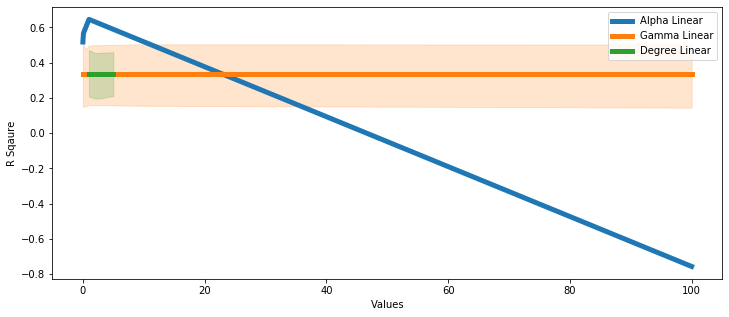

In [31]:
plt.figure(figsize = (12,5))
kr = KernelRidge(alpha = 1.0, kernel = 'linear', gamma = 0.0001, degree = 1)
print(kr.fit(x_train,y_train))
preds_KR_Linear = kr.predict(x_test)
print('R Square : {}'.format(r2_score(y_test,preds_KR_Linear)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_KR_Linear)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,preds_KR_Linear)))
sns.lineplot(alpha_linear,score_linear,lw = 5,label = 'Alpha Linear')
sns.lineplot(gamma_linear,score_linear, lw = 5,label = 'Gamma Linear')
sns.lineplot(degree_linear,score_linear, lw = 5,label = 'Degree Linear')
plt.xlabel('Values')
plt.ylabel('R Sqaure')


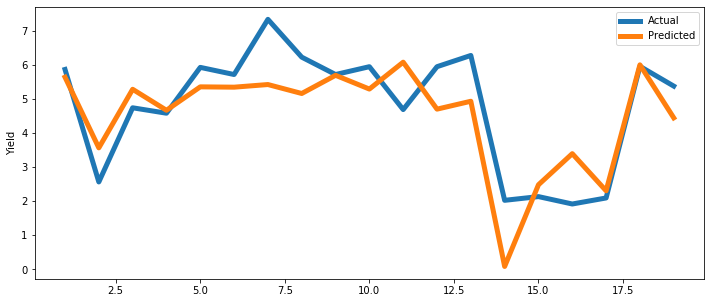

In [32]:
plt.figure(figsize = (12,5))
index = np.linspace(1,19,19)
sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_KR_Linear,label = 'Predicted',lw = 5)

KernelRidge(alpha=0.01, coef0=1, degree=1, gamma=0.1, kernel='rbf',
            kernel_params=None)
R Square : 0.8149496214865132
Mean Absolute Error : 0.6029071402469317
Mean Squared Error : 0.5318069810809112


Text(0, 0.5, 'R Sqaure')

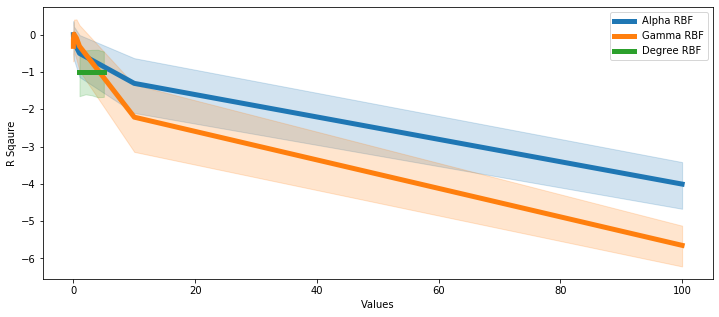

In [33]:
plt.figure(figsize = (12,5))
kr = KernelRidge(alpha = 0.01, kernel = 'rbf', gamma = 0.1, degree = 1)
print(kr.fit(x_train,y_train))
preds_KR_RBF = kr.predict(x_test)
print('R Square : {}'.format(r2_score(y_test,preds_KR_RBF)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_KR_RBF)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,preds_KR_RBF)))
sns.lineplot(alpha_rbf,score_rbf,lw = 5,label = 'Alpha RBF')
sns.lineplot(gamma_rbf,score_rbf, lw = 5,label = 'Gamma RBF')
sns.lineplot(degree_rbf,score_rbf, lw = 5,label = 'Degree RBF')
plt.xlabel('Values')
plt.ylabel('R Sqaure')

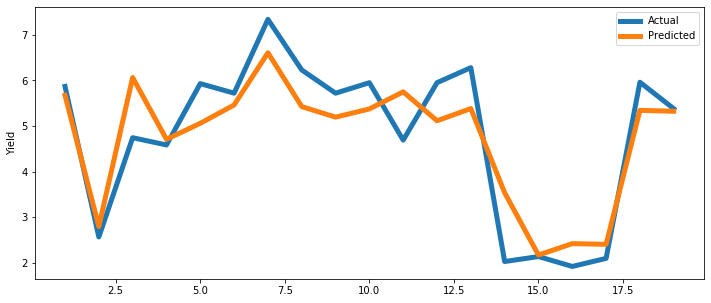

In [34]:
plt.figure(figsize = (12,5))

sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_KR_RBF,label = 'Predicted',lw = 5)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=0.5, kernel='poly',
            kernel_params=None)
R Square : 0.8515399435037108
Mean Absolute Error : 0.5431288467868115
Mean Squared Error : 0.42665189388217817


Text(0, 0.5, 'R Sqaure')

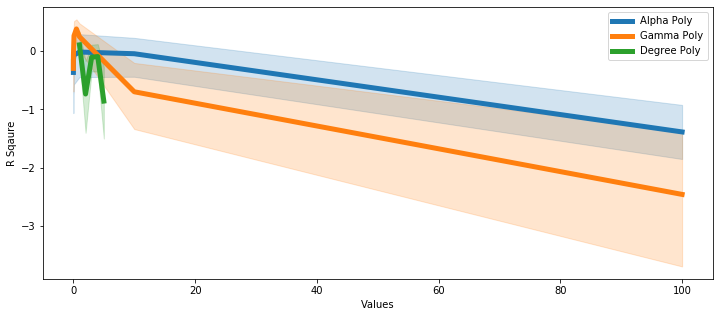

In [35]:
plt.figure(figsize = (12,5))
kr = KernelRidge(alpha = 1.0, kernel = 'poly', gamma = 0.5, degree = 3)
print(kr.fit(x_train,y_train))
preds_KR_Poly = kr.predict(x_test)
print('R Square : {}'.format(r2_score(y_test,preds_KR_Poly)))
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test,preds_KR_Poly)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,preds_KR_Poly)))
sns.lineplot(alpha_poly,score_poly,lw = 5,label = 'Alpha Poly')
sns.lineplot(gamma_poly,score_poly, lw = 5,label = 'Gamma Poly')
sns.lineplot(degree_poly,score_poly, lw = 5,label = 'Degree Poly')
plt.xlabel('Values')
plt.ylabel('R Sqaure')

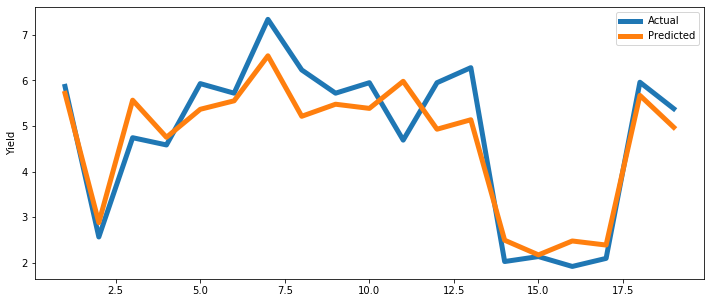

In [36]:
plt.figure(figsize = (12,5))

sns.lineplot(index,y_test,label = 'Actual',lw = 5)
sns.lineplot(index,preds_KR_Poly,label = 'Predicted',lw = 5)

In [37]:
# Suggestion Dataset is imported 
Data = pd.read_csv('Suggestion_DataSet(1).csv')


In [38]:
Data.drop('Place ',axis = 1,inplace = True)

In [39]:
from sklearn.kernel_ridge import KernelRidge
# Since K nearest Neighbors performed best it was implemented on the suggestion dataset
kr = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree',leaf_size = 1, p = 1)
kr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='uniform')

In [40]:
Data.drop('Year ',axis = 1,inplace = True)

In [41]:
len(Data.columns)

14

In [42]:
len(X.columns)

9

In [43]:
Data = Data[['Place_code', 'Rainfall', 'Min_Temperature', 'Max_Temperature',
       'Sowing_Day', 'Sowing_Month', 'Sowing_Rainfall', 'Sowing_Min',
       'Sowing_Max']]
scaler = MinMaxScaler()
Data_1 = Data
Data_1 = pd.DataFrame(scaler.fit_transform(Data_1), columns=Data_1.columns, index=Data_1.index)

In [44]:

Data.to_csv('Seeds_Data.csv')
Data_1

,Place_code,Rainfall,Min_Temperature,Max_Temperature,Sowing_Day,Sowing_Month,Sowing_Rainfall,Sowing_Min,Sowing_Max
0,0.0,0.456522,0.860841,0.695833,0.0,0.0,0.323625,0.842105,1.000000
1,0.0,0.521182,0.802589,0.618056,0.0,0.0,0.019417,0.552632,0.512821
2,0.0,0.712189,0.815534,0.562500,0.0,0.0,0.048544,0.868421,0.679487
3,0.0,0.869751,0.779935,0.506944,0.0,0.0,0.000000,0.631579,0.653846
4,0.0,0.924749,0.757282,0.420139,0.0,0.0,0.129450,0.736842,0.269231
5,0.0,0.413973,0.828479,0.656250,0.0,0.0,0.741100,0.578947,0.641026
6,0.0,0.384615,0.815534,0.590278,0.0,0.0,0.019417,0.526316,0.653846
7,0.0,0.703828,0.799353,0.513889,0.0,0.0,0.595469,0.552632,0.076923
8,0.0,0.895392,0.779935,0.496528,0.0,0.0,0.003236,0.578947,0.371795
9,0.0,0.921962,0.766990,0.461806,0.0,0.0,0.051780,0.315789,0.589744


In [45]:
preds = []
preds = kr.predict(Data_1)

In [46]:
j = 2
for i in range(65):
    
    if i == j:
        
        print(preds[i])
        j = j+5
    
    

2.3386666666666667
3.6166666666666667
3.639333333333333
5.6433333333333335
5.773333333333333
5.656666666666666
5.723333333333334
5.723333333333334
5.6433333333333335
5.656666666666666
4.326666666666667
5.657333333333334
2.3386666666666667


In [47]:
preds

array([4.63933333, 4.82966667, 2.33866667, 3.52666667, 3.61666667,
       4.85333333, 5.50466667, 3.61666667, 3.63933333, 3.61666667,
       5.414     , 4.67633333, 3.63933333, 2.982     , 3.63933333,
       5.65666667, 5.64333333, 5.64333333, 5.64333333, 5.64333333,
       5.83      , 5.75      , 5.77333333, 5.64333333, 4.69266667,
       5.83      , 4.61266667, 5.65666667, 5.65666667, 5.72333333,
       5.65666667, 5.65666667, 5.72333333, 5.64333333, 5.64333333,
       5.65666667, 5.64333333, 5.72333333, 5.78666667, 5.65666667,
       5.77333333, 5.64333333, 5.64333333, 5.64333333, 5.64333333,
       5.83      , 5.83      , 5.65666667, 5.64333333, 5.64333333,
       5.764     , 5.834     , 4.32666667, 3.655     , 2.44766667,
       4.667     , 4.574     , 5.65733333, 3.68633333, 5.10133333,
       2.40733333, 2.36266667, 2.33866667, 2.33866667, 2.33866667])

In [48]:
X.columns

Index(['Place_code', 'Rainfall', 'Min_Temperature', 'Max_Temperature',
       'Sowing_Day', 'Sowing_Month', 'Sowing_Rainfall', 'Sowing_Min',
       'Sowing_Max'],
      dtype='object')

In [102]:
#Storing the values for analysis purpose into lists 
Rainfall = [] 
Min_Temperature = []
Max_Temperature = []
Sowing_Day = []
Sowing_Month= []
Sowing_Rainfall = []
Sowing_Min = []
#Harvesting_Day = [] 
Sowing_Max = []
'''Harvesting_Month = []
Harvesting_Rainfall = []
Harvesting_Min = []
Harvesting_Max = []'''

max_Rainfall = [] 
max_Min_Temperature = []
max_Max_Temperature = []
max_Sowing_Day = []
max_Sowing_Month= []
max_Sowing_Rainfall = []
max_Sowing_Min = []
#max_Harvesting_Day = [] 
max_Sowing_Max = []
max_Harvesting_Month = []
'''max_Harvesting_Rainfall = []
max_Harvesting_Min = []
max_Harvesting_Max = []'''

min_Rainfall = [] 
min_Min_Temperature = []
min_Max_Temperature = []
min_Sowing_Day = []
min_Sowing_Month= []
min_Sowing_Rainfall = []
min_Sowing_Min = []
#min_Harvesting_Day = [] 
min_Sowing_Max = []
'''min_Harvesting_Month = []
min_Harvesting_Rainfall = []
min_Harvesting_Min = []
min_Harvesting_Max = []'''
ideal_weeks = []
Yield = [5.38, 5.32, 5.43, 5.65, 5.72, 5.78, 5.72, 5.82, 5.96, 5.89, 6.28, 6.23, 6.32 ]
min_Yield = []
max_Yield = []
index = 0
actual_index = 2
for i in range(13):
    max_yield = -1
    min_yield = 100
    print(index)
    max_index = 0
    min_index = 0
    for j in range(5):
        
        if preds[index]>max_yield:
            
            max_yield = preds[index]
            max_index = index
            
        if preds[index]<min_yield:
            
            min_yield = preds[index]
            min_index = index
        
        if index == actual_index:
            
            Rainfall.append(Data['Rainfall'][index])
            Min_Temperature.append(Data['Min_Temperature'][index])
            Max_Temperature.append(Data['Max_Temperature'][index])
            Sowing_Day.append(Data['Sowing_Day'][index])
            Sowing_Month.append(Data['Sowing_Month'][index])
            Sowing_Rainfall.append(Data['Sowing_Rainfall'][index])
            Sowing_Min.append(Data['Sowing_Min'][index])
            #Harvesting_Day.append(Data['Harvesting_Day '][index])
            Sowing_Max.append(Data['Sowing_Max'][index])
            '''Harvesting_Month.append(Data['Harvesting_Month'][index])
            Harvesting_Rainfall.append(Data['Harvesting_Rainfall'][index])
            Harvesting_Min.append(Data['Harvesting_Min'][index])
            Harvesting_Max.append(Data['Harvesting_Max'][index])  '''
            
            actual_index = actual_index+5
        
        index = index+1
        
    max_Rainfall.append(Data['Rainfall'][max_index])
    max_Min_Temperature.append(Data['Min_Temperature'][max_index])
    max_Max_Temperature.append(Data['Max_Temperature'][max_index])
    max_Sowing_Day.append(Data['Sowing_Day'][max_index])
    max_Sowing_Month.append(Data['Sowing_Month'][max_index])
    max_Sowing_Rainfall.append(Data['Sowing_Rainfall'][max_index])
    max_Sowing_Min.append(Data['Sowing_Min'][max_index])
    #max_Harvesting_Day.append(Data['Harvesting_Day '][max_index])
    max_Sowing_Max.append(Data['Sowing_Max'][max_index])
    '''max_Harvesting_Month.append(Data['Harvesting_Month'][max_index])
    max_Harvesting_Rainfall.append(Data['Harvesting_Rainfall'][max_index])
    max_Harvesting_Min.append(Data['Harvesting_Min'][max_index])
    max_Harvesting_Max.append(Data['Harvesting_Max'][max_index])'''
    max_Yield.append(max_yield)
    
    min_Rainfall.append(Data['Rainfall'][min_index])
    min_Min_Temperature.append(Data['Min_Temperature'][min_index])
    min_Max_Temperature.append(Data['Max_Temperature'][min_index])
    min_Sowing_Day.append(Data['Sowing_Day'][min_index])
    min_Sowing_Month.append(Data['Sowing_Month'][min_index])
    min_Sowing_Rainfall.append(Data['Sowing_Rainfall'][min_index])
    min_Sowing_Min.append(Data['Sowing_Min'][min_index])
   # min_Harvesting_Day.append(Data['Harvesting_Day '][min_index])
    min_Sowing_Max.append(Data['Sowing_Max'][min_index])
    '''min_Harvesting_Month.append(Data['Harvesting_Month'][min_index])
    min_Harvesting_Rainfall.append(Data['Harvesting_Rainfall'][min_index])
    min_Harvesting_Min.append(Data['Harvesting_Min'][min_index])
    min_Harvesting_Max.append(Data['Harvesting_Max'][min_index])'''
    min_Yield.append(min_yield)
    ideal_weeks.append(max_index%5+1)
    
        
        

0
5
10
15
20
25
30
35
40
45
50
55
60


In [50]:
max_Rainfall[0]

371.4

In [51]:
actual_values = [5.38, 5.32, 5.43, 5.65, 5.72, 5.78, 5.72, 5.82, 5.96, 5.89, 6.28, 6.23, 6.32  ]

In [52]:
df.columns

Index(['Place ', 'Year ', 'Rainfall', 'Min_Temperature', 'Max_Temperature',
       'Sowing_Day', 'Sowing_Month', 'Sowing_Rainfall', 'Sowing_Min',
       'Sowing_Max', 'Harvesting_Day ', 'Harvesting_Month',
       'Harvesting_Rainfall', 'Harvesting_Min', 'Harvesting_Max', 'Yield',
       'Place_code'],
      dtype='object')

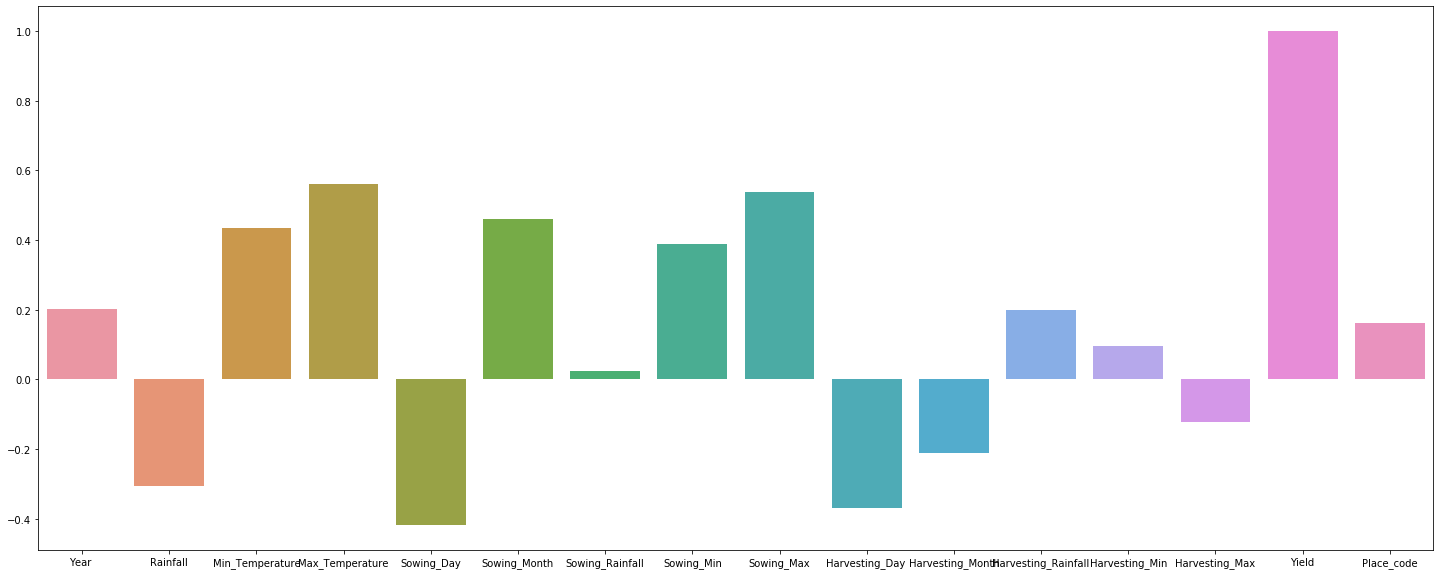

In [53]:
correlations = []

for i in df.columns[1:]:
    
    correlations.append(np.corrcoef(df[i],df['Yield'])[0][1])



correlations = []

for i in df.columns[1:]:
    
    correlations.append(np.corrcoef(df[i],df['Yield'])[0][1])



correlations


plt.figure(figsize = (25,10))
sns.barplot(df.columns[1:],correlations)



In [54]:
index = np.linspace(1,13,13)

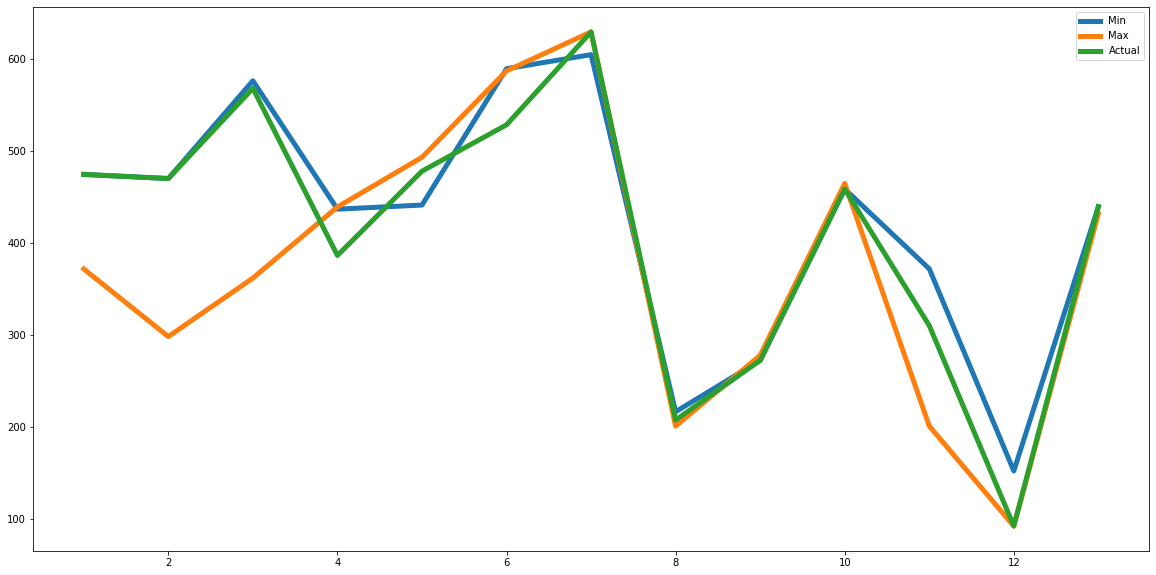

In [55]:
plt.figure(figsize = (20,10))
sns.lineplot(index,min_Rainfall,label = 'Min',lw = 5)
sns.lineplot(index,max_Rainfall,label = 'Max',lw = 5)
sns.lineplot(index,Rainfall,label = 'Actual',lw = 5)

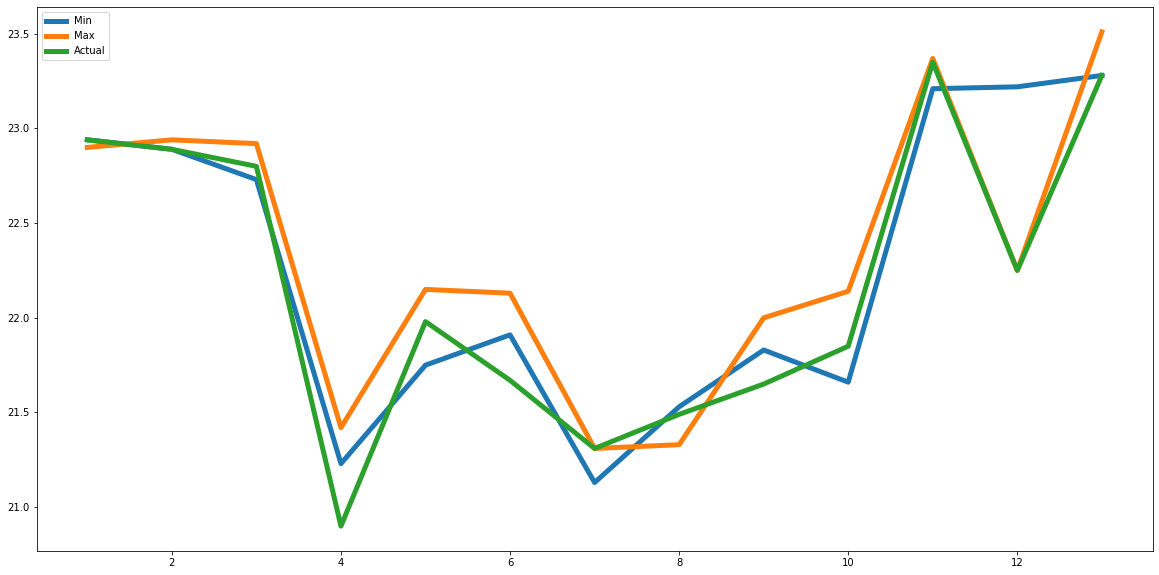

In [56]:
plt.figure(figsize = (20,10))
sns.lineplot(index,min_Min_Temperature,label = 'Min',lw = 5)
sns.lineplot(index,max_Min_Temperature,label = 'Max',lw = 5)
sns.lineplot(index,Min_Temperature,label = 'Actual',lw = 5)

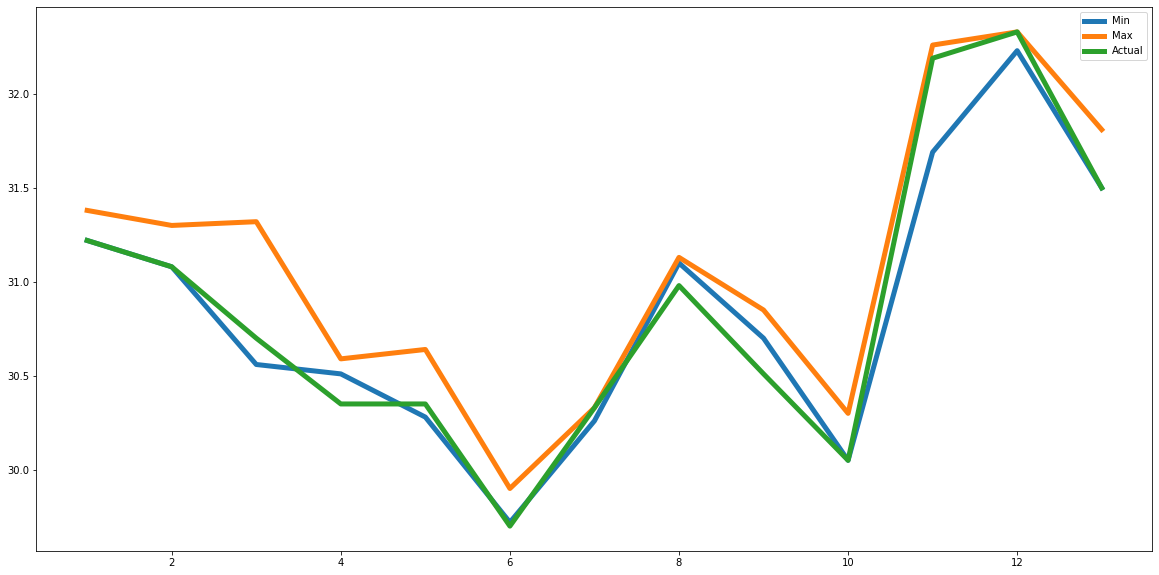

In [57]:
plt.figure(figsize = (20,10))
sns.lineplot(index,min_Max_Temperature,label = 'Min',lw = 5)
sns.lineplot(index,max_Max_Temperature,label = 'Max',lw = 5)
sns.lineplot(index,Max_Temperature,label = 'Actual',lw = 5)

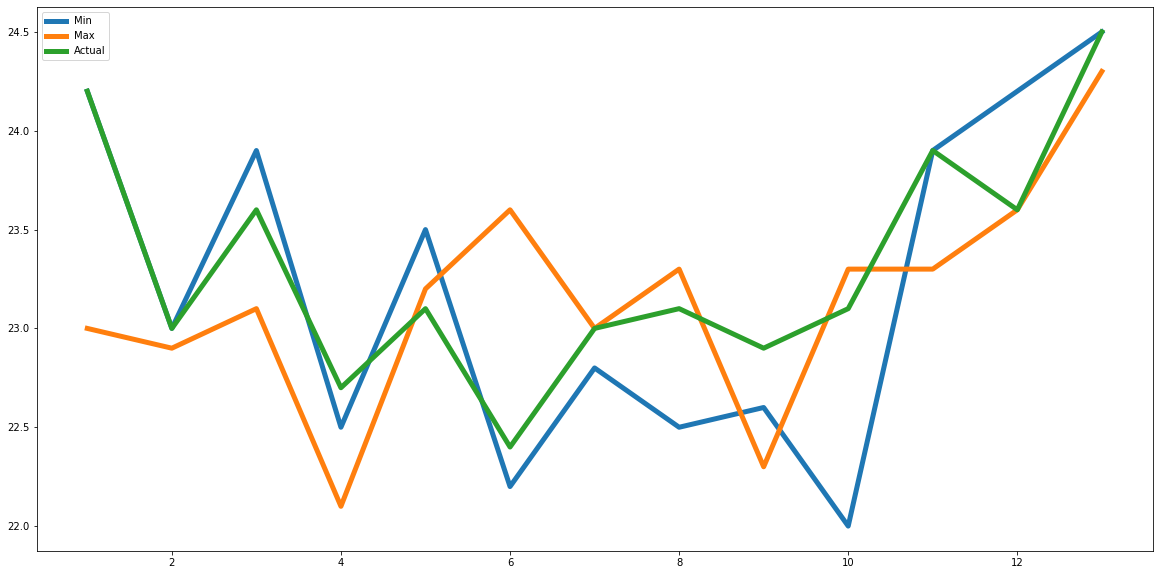

In [58]:
plt.figure(figsize = (20,10))
sns.lineplot(index,min_Sowing_Min,label = 'Min',lw = 5)
sns.lineplot(index,max_Sowing_Min,label = 'Max',lw = 5)
sns.lineplot(index,Sowing_Min,label = 'Actual',lw = 5)

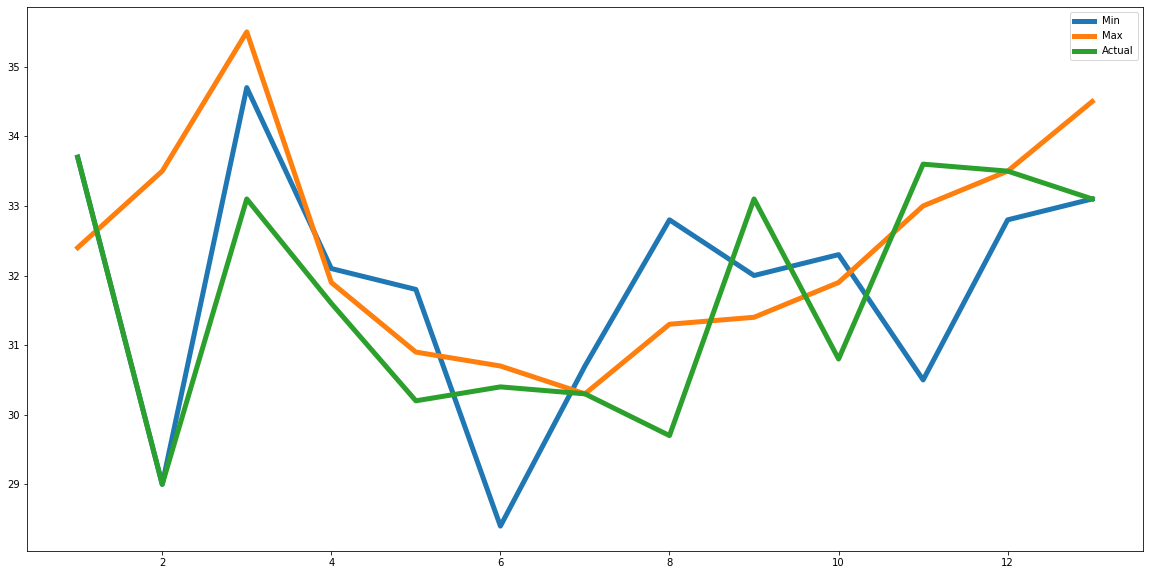

In [59]:
plt.figure(figsize = (20,10))
sns.lineplot(index,min_Sowing_Max,label = 'Min',lw = 5)
sns.lineplot(index,max_Sowing_Max,label = 'Max',lw = 5)
sns.lineplot(index,Sowing_Max,label = 'Actual',lw = 5)

In [60]:
"""Indian Met Dept"""
"""NCMRWF """

'NCMRWF '

In [61]:
suggestive_data = {'Rainfall':Rainfall,'Max_Temperature':Max_Temperature,'Min_Temperature':Min_Temperature,'Min_Temperature':Min_Temperature,'Sowing_Max':Sowing_Max,'Sowing_Min':Sowing_Min,'Sowing_Day':Sowing_Day,'Sowing_Month':Sowing_Month,'Sowing_Rainfall':Sowing_Rainfall,
                  'max_Rainfall':max_Rainfall,'max_Max_Temperature':max_Max_Temperature,'max_Min_Temperature':max_Min_Temperature,
                  'max_Sowing_Day':max_Sowing_Day,'max_Sowing_Month':max_Sowing_Month,'max_Sowing_Max':max_Sowing_Max,'max_Sowing_Min':max_Sowing_Min,
                  'max_Sowing_Rainfall':max_Sowing_Rainfall,'min_Rainfall':min_Rainfall,'min_Max_Temperature':min_Max_Temperature,'min_Min_Temperature':min_Min_Temperature,
                  'min_Sowing_Day':min_Sowing_Day,'min_Sowing_Month':min_Sowing_Month,'min_Sowing_Max':min_Sowing_Max,'min_Sowing_Min':min_Sowing_Min,
                  'min_Sowing_Rainfall':min_Sowing_Rainfall,
                   'Yield':Yield,'max_Yield':max_Yield,'min_Yield':min_Yield}

#suggestive_data = pd.DataFrame(suggestive_data)

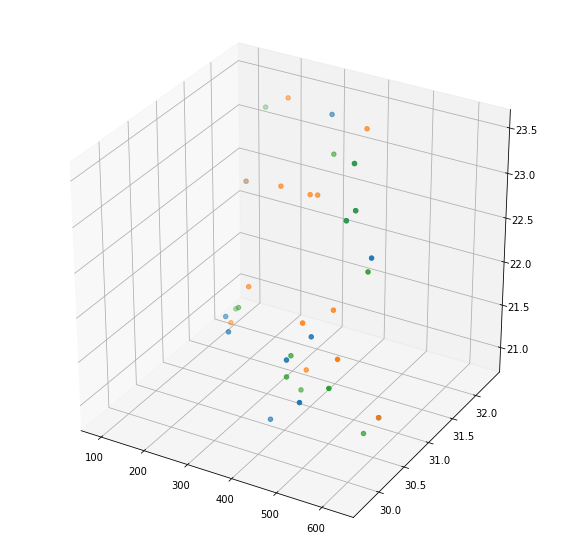

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(suggestive_data['Rainfall'],suggestive_data['Max_Temperature'],suggestive_data['Min_Temperature'])
ax.scatter(suggestive_data['max_Rainfall'],suggestive_data['max_Max_Temperature'],suggestive_data['max_Min_Temperature'])
ax.scatter(suggestive_data['min_Rainfall'],suggestive_data['min_Max_Temperature'],suggestive_data['min_Min_Temperature'])

In [63]:
print(suggestive_data['Yield'])

[5.38, 5.32, 5.43, 5.65, 5.72, 5.78, 5.72, 5.82, 5.96, 5.89, 6.28, 6.23, 6.32]


In [64]:
print(suggestive_data['max_Yield'])

[4.829666666666667, 5.504666666666666, 5.414000000000001, 5.656666666666666, 5.830000000000001, 5.830000000000001, 5.723333333333334, 5.786666666666666, 5.773333333333333, 5.830000000000001, 5.8340000000000005, 5.657333333333334, 2.4073333333333338]


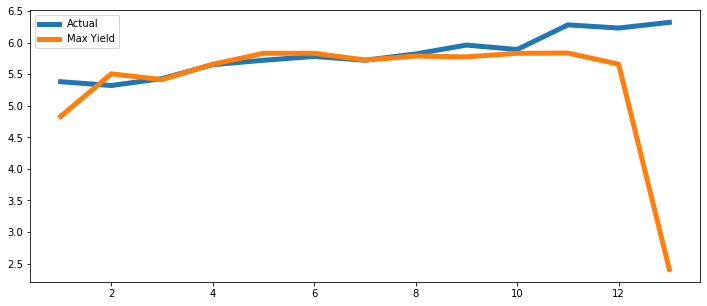

In [76]:
plt.figure(figsize=(12,5))
indices = np.linspace(1,13,13)
sns.lineplot(indices,suggestive_data['Yield'],label = 'Actual',lw = 5)
sns.lineplot(indices,suggestive_data['max_Yield'],label = 'Max Yield',lw = 5)

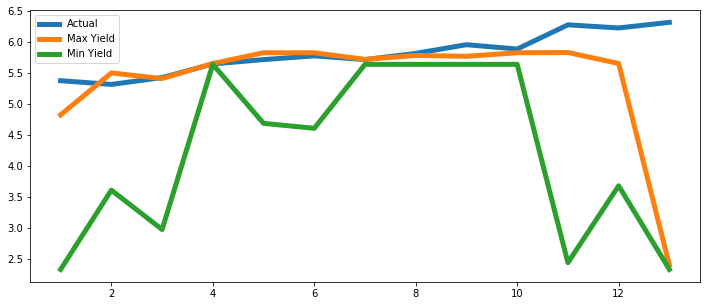

In [77]:
plt.figure(figsize=(12,5))
indices = np.linspace(1,13,13)
sns.lineplot(indices,suggestive_data['Yield'],label = 'Actual',lw = 5)
sns.lineplot(indices,suggestive_data['max_Yield'],label = 'Max Yield',lw = 5)
sns.lineplot(indices,suggestive_data['min_Yield'],label = 'Min Yield',lw = 5)

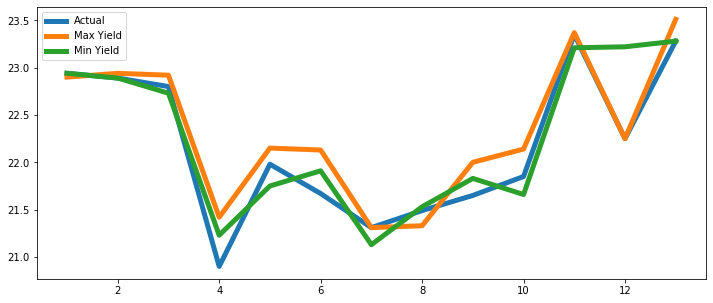

In [78]:
plt.figure(figsize=(12,5))
sns.lineplot(indices,suggestive_data['Min_Temperature'],label = 'Actual',lw = 5)
sns.lineplot(indices,suggestive_data['max_Min_Temperature'],label = 'Max Yield',lw = 5)
sns.lineplot(indices,suggestive_data['min_Min_Temperature'],label = 'Min Yield',lw = 5)

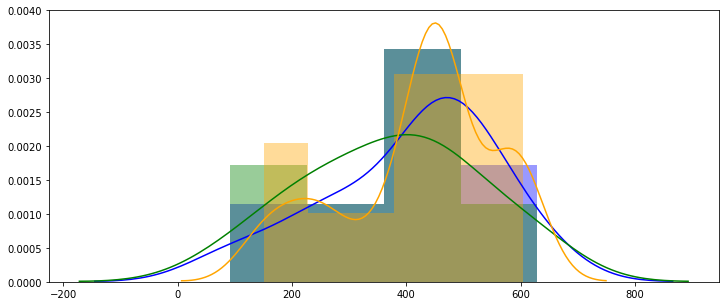

In [79]:
plt.figure(figsize=(12,5))
sns.distplot(suggestive_data['Rainfall'],label = 'Actual',color = 'Blue')
sns.distplot(suggestive_data['max_Rainfall'],label = 'Max Yield',color = 'Green')
sns.distplot(suggestive_data['min_Rainfall'],label = 'Min Yield',color ='Orange')

In [80]:
suggestive_data.keys()

dict_keys(['Rainfall', 'Max_Temperature', 'Min_Temperature', 'Sowing_Max', 'Sowing_Min', 'Sowing_Day', 'Sowing_Month', 'Sowing_Rainfall', 'max_Rainfall', 'max_Max_Temperature', 'max_Min_Temperature', 'max_Sowing_Day', 'max_Sowing_Month', 'max_Sowing_Max', 'max_Sowing_Min', 'max_Sowing_Rainfall', 'min_Rainfall', 'min_Max_Temperature', 'min_Min_Temperature', 'min_Sowing_Day', 'min_Sowing_Month', 'min_Sowing_Max', 'min_Sowing_Min', 'min_Sowing_Rainfall', 'Yield', 'max_Yield', 'min_Yield'])

In [81]:
df.describe()

,Year,Rainfall,Min_Temperature,Max_Temperature,Sowing_Day,Sowing_Month,Sowing_Rainfall,Sowing_Min,Sowing_Max,Harvesting_Day,Harvesting_Month,Harvesting_Rainfall,Harvesting_Min,Harvesting_Max,Yield,Place_code,Yield_code
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,2011.136842,521.540737,21.487274,31.091379,11.663158,6.210526,19.438842,21.522602,32.584391,16.631579,9.273684,14.262241,19.520571,32.752376,4.773568,3.442105,0.936842
std,3.763233,570.582564,4.072960,2.454060,9.371313,1.245372,40.699838,6.213317,5.437566,11.649174,2.594766,35.891467,12.780317,22.365503,1.722824,2.327979,0.681215
min,2005.000000,6.600000,11.800000,21.660000,1.000000,4.000000,0.000000,4.428571,18.214286,1.000000,1.000000,0.000000,2.400000,20.014286,1.248000,0.000000,0.000000
25%,2008.000000,69.500000,20.027500,29.750000,4.500000,6.000000,0.000000,20.120000,30.105000,3.000000,9.000000,0.000000,17.020000,29.250000,2.571000,2.000000,0.000000
50%,2011.000000,382.500000,22.760000,31.200000,10.000000,6.000000,4.400000,23.000000,33.300000,15.000000,10.000000,0.000000,19.600000,30.800000,5.430000,3.000000,1.000000
75%,2014.000000,707.100000,24.750000,32.250000,16.000000,7.000000,19.950000,25.600000,35.425000,30.000000,10.000000,5.400000,21.850000,32.450000,5.955000,6.000000,1.000000
max,2018.000000,2439.400000,26.700000,35.833000,30.000000,9.000000,237.400000,29.600000,41.800000,30.000000,12.000000,222.000000,131.100000,246.100000,8.060000,7.000000,2.000000


In [82]:
len(df[df['Yield']>6])

17

In [83]:
len(df[(df['Yield']>3) & (df['Yield']<6)])

51

In [84]:
def class_Yield(n):
    
    if n < 3:
        
        return 0
    elif n >= 3 and n< 6:
        
        return 1
    
    elif n>=6:
        return 2
    
df['Yield_code'] = df['Yield'].apply(class_Yield)
    

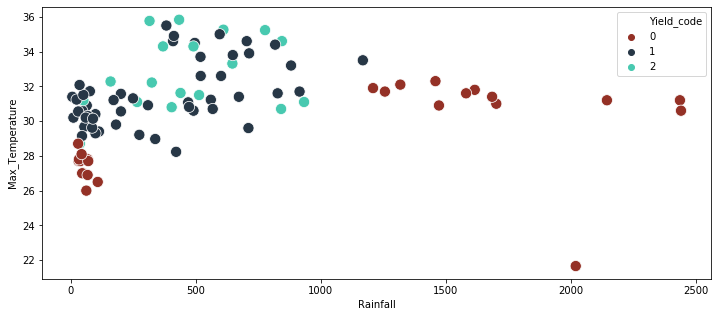

In [87]:
plt.figure(figsize=(12,5))

sns.scatterplot(df['Rainfall'],df['Max_Temperature'],hue = df['Yield_code'],palette = ['#943126','#273746','#48C9B0'],s = 125)

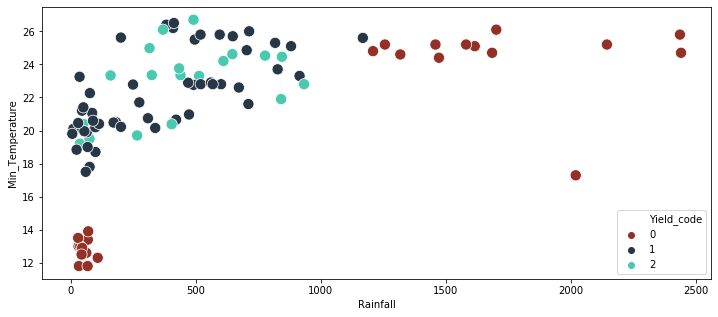

In [85]:
plt.figure(figsize=(12,5))

sns.scatterplot(df['Rainfall'],df['Min_Temperature'],hue = df['Yield_code'],palette = ['#943126','#273746','#48C9B0'],s = 125)

In [86]:
for i in df.columns[1:]:
    
    print('{}      {}     \n'.format(i,np.corrcoef(df[i],df['Yield'])[0][1]))

print(df.columns)

Year       0.20088095141429513     

Rainfall      -0.30595009708712667     

Min_Temperature      0.4340412557680904     

Max_Temperature      0.5595990384311554     

Sowing_Day      -0.41803729277217916     

Sowing_Month      0.46011272262877295     

Sowing_Rainfall      0.024726006875503404     

Sowing_Min      0.38835011680040765     

Sowing_Max      0.5372619596465172     

Harvesting_Day       -0.36965526998330256     

Harvesting_Month      -0.21129827836678633     

Harvesting_Rainfall      0.1987012548665167     

Harvesting_Min      0.09671290844592055     

Harvesting_Max      -0.12333831984646869     

Yield      1.0     

Place_code      0.16231622039089486     

Yield_code      0.9113733746973101     

Index(['Place ', 'Year ', 'Rainfall', 'Min_Temperature', 'Max_Temperature',
       'Sowing_Day', 'Sowing_Month', 'Sowing_Rainfall', 'Sowing_Min',
       'Sowing_Max', 'Harvesting_Day ', 'Harvesting_Month',
       'Harvesting_Rainfall', 'Harvesting_Min', 'Harvesting_Ma

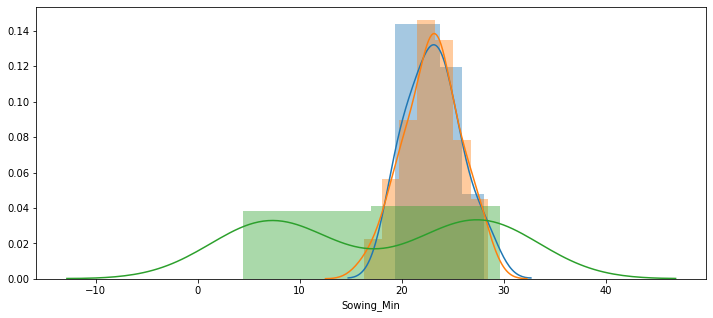

In [96]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Yield_code']==2]['Sowing_Min'])
sns.distplot(df[df['Yield_code']==1]['Sowing_Min'])
sns.distplot(df[df['Yield_code']==0]['Sowing_Min'])


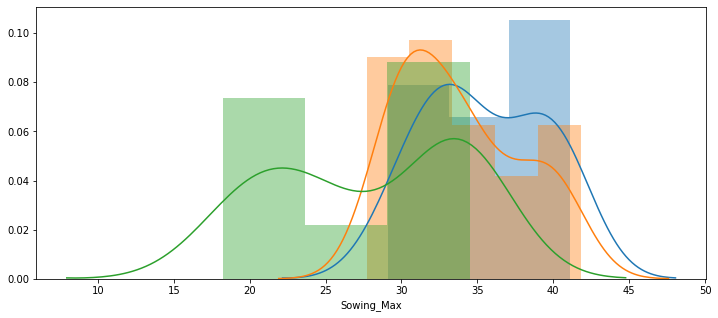

In [97]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Yield_code']==2]['Sowing_Max'])
sns.distplot(df[df['Yield_code']==1]['Sowing_Max'])
sns.distplot(df[df['Yield_code']==0]['Sowing_Max'])


In [101]:
for i in range(13):
    
    print('{}    {}    {}\n'.format(suggestive_data['Yield'][i],suggestive_data['max_Yield'][i],suggestive_data['min_Yield'][i]))

5.38    4.829666666666667    2.3386666666666667

5.32    5.504666666666666    3.6166666666666667

5.43    5.414000000000001    2.9819999999999998

5.65    5.656666666666666    5.6433333333333335

5.72    5.830000000000001    4.692666666666667

5.78    5.830000000000001    4.612666666666667

5.72    5.723333333333334    5.6433333333333335

5.82    5.786666666666666    5.6433333333333335

5.96    5.773333333333333    5.6433333333333335

5.89    5.830000000000001    5.6433333333333335

6.28    5.8340000000000005    2.4476666666666667

6.23    5.657333333333334    3.6863333333333337

6.32    2.4073333333333338    2.3386666666666667



In [103]:
ideal_weeks

[2, 2, 1, 1, 1, 1, 3, 4, 1, 1, 2, 3, 1]